# Problema 3 (tema 4)

Consideremos el siguiente problema de valor inicial:

\begin{align*}
      &y'= 1-y^2 \quad x\in[0,5],\\
      &y(0)=0,
\end{align*}

1) Aproximar la solución con $h=0.5$ usando, definir 4 funciones, `pasoEuler(f, tn, yn, h)`, `pasoHeunn(f, tn, yn, h)`, `pasoEC(f, tn, yn, h)` y `pasoRK(f, tn, yn, h)`, que aproximen la solución $y(t_{n+1})$ de la ecuación diferencial $y'=f(t,y)$ partir de un paso de tamaño $h$ desde la aproximación $yn \simeq y(t_n)$ usando respectivamente:

    a. El método de Euler.
 
    b. El método de Heunn.
    
    c. El método de Euler-Cauchy.
    
    d. El método de Runge Kutta.

2) Definir una función `metodoUnPaso(f, t, y0, funcionPaso)` que proxime el problema de valor inicial $y'=f(t,y)$, $y(t_0)=y0$ en los puntos equiespaciados $t_0$, $t_1$, ..., $t_N$ contenidos en el array `t`. El parámetro funcionPaso representará el método a utilizar y será una de las cuatro funciones definidas en el apartado anterior

3) Sabiendo que la solución exacta es $$y(t) = \frac{e^{2t}-1}{e^{2t}+1},$$
calcular los errores de discretización (para cada úno de los métodos). Representarlos en una gráfica de barras


In [1]:
%pylab inline

f = lambda x,y: 1-y**2

a, b = 0, 5
y_a = 0
h = 0.5

y_exacta = lambda t: (e**(2*t)-1)/(e**(2*t)+1) # Otra forma de definir funciones 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def runge_kutta(f, y_a, a, b, h):
    """
    Resuelve el sistema de ecuaciones y'=f(t,y) en [a,b]
    mediante el método de Runge-Kutta con paso h
    """
    N = int( round( (b-a)/h) )
    soporte = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn = soporte[i]
        k1 = f(tn, yn)
        k2 = f(tn+h/2, yn + h/2 * k1)
        k3 = f(tn+h/2, yn + h/2 * k2)
        k4 = f(tn+h, yn + h * k3)
        yn = yn + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        sol.append(yn)
    return soporte, sol

In [3]:
soporte, sol_rk = runge_kutta(f, y_a, a, b, h)

In [4]:
def euler(f, y_a, a, b, h):
    N = int( round( (b-a)/h) )
    soporte = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn = soporte[i]
        yn = yn + h*f(tn, yn)
        sol.append(yn)
    return soporte, sol
soporte, sol_euler = euler(f, y_a, a, b, h)

In [5]:
def euler_cauchy(f, y_a, a, b, h):
    N = int( round( (b-a)/h) )
    soporte = linspace(a, b, N+1)
    sol = [y_a]
    yn = y_a
    for i in range(N): # i = 0, 1, ..., N-1
        tn = soporte[i]
        k1 = yn + h/2*f(tn+h/2, yn)
        yn = yn + h*f(tn, k1)
        sol.append(yn)
    return soporte, sol
soporte, sol_ec = euler_cauchy(f, y_a, a, b, h)

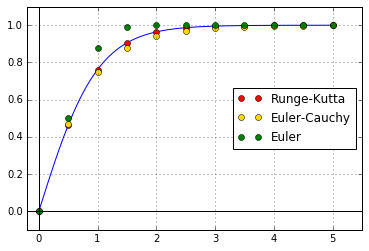

In [6]:
# Solución exacta
x_fino = linspace(a, b, 200)
plot(x_fino, y_exacta(x_fino))

# Runge-Kutta
plot(soporte, sol_rk, 'o', c='red', label='Runge-Kutta')

# Euler-Cauchy
plot(soporte, sol_ec, 'o', c='gold', label='Euler-Cauchy')

# Euler
plot(soporte, sol_euler, 'o', c='green', label='Euler')

ylim(-0.1, 1.1) # Intervalo para eje Y
xlim(-0.2,5.5)
axhline(c='black')
axvline(c='black')
grid()
legend(loc='best')

### Errores en norma infinito

In [7]:
# Mátodo 1
N = len(soporte)-1
errores_euler = [ abs(sol_euler[i] - y_exacta(soporte[i]))  for i in range(N+1)]
print("Error Euler (norma infinito):", max(errores_euler))

Error Euler (norma infinito): 0.113405844044


In [8]:
# Método 2 (mejora del anterior):
errores_euler = abs(array(sol_euler) - array(y_exacta(soporte)))
errores_euler
print("Error Euler (norma infinito):", max(errores_euler))

Error Euler (norma infinito): 0.113405844044


Igual para Runge-Kutta y Euler Cauchy:

In [9]:
errores_ec = abs(array(sol_ec) - array(y_exacta(soporte)))
print("Error Euler-Cauchy (norma infinito):", max(errores_ec))
errores_rk = abs(array(sol_rk) - array(y_exacta(soporte)))
print("Error Runge-Kutta (norma infinito):", max(errores_rk))

Error Euler-Cauchy (norma infinito): 0.0251410679413
Error Runge-Kutta (norma infinito): 0.00155579730593


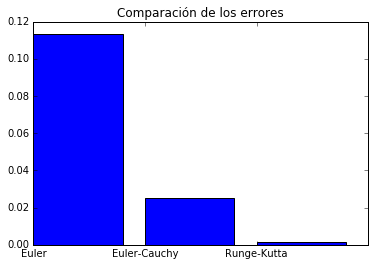

In [10]:
bar([0,1,2],[max(errores_euler),max(errores_ec),max(errores_rk)], 
    tick_label=['Euler','Euler-Cauchy','Runge-Kutta'])
title("Comparación de los errores")

In [11]:
help(bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      